This script is used to pick what FOVs inside the simulation we should pick out and add noise to.  We want to pick regions where there are strong filaments inside the FOV.

Do some examples for extracting the FOV from the complete simulation.

In [2]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

First, let's take a look at the total simulation (just pick larger distance/resolution so smaller file and quicker loading):

In [8]:
distance = '100Mpc'; resolution = 100.; slicewidth = 5; machine='coho'
data_tuple_5 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)
print data_tuple_5[0].shape

distance = '100Mpc'; resolution = 100.; slicewidth = 20; machine='coho'
data_tuple_20 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)
print data_tuple_20[0].shape

data_100Mpc_100arcsec.npz exists, loading now...
(2000, 2000)
Loading data of slicewidth 20 (after rounding), number of slices is 4
data_100Mpc_100arcsec_20slwd.npz exists, loading now...
(2000, 2000)


The type of size is <type 'int'>
The type of size is <type 'int'>
The type of size is <type 'float'>
The type of size is <type 'float'>
The type of size is <type 'float'>
The type of size is <type 'float'>


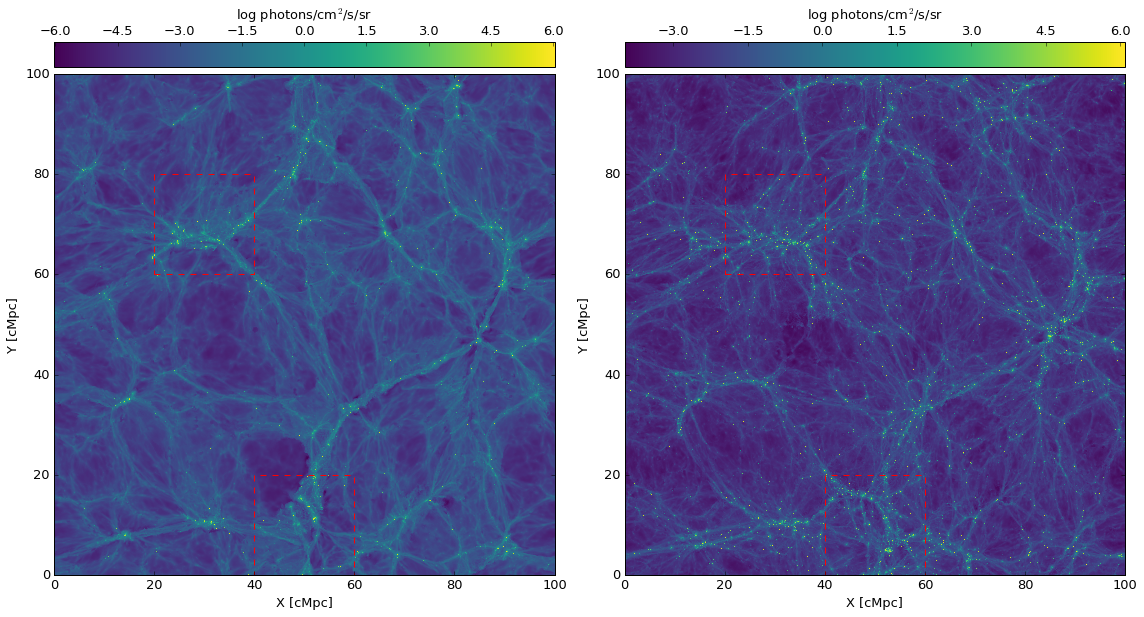

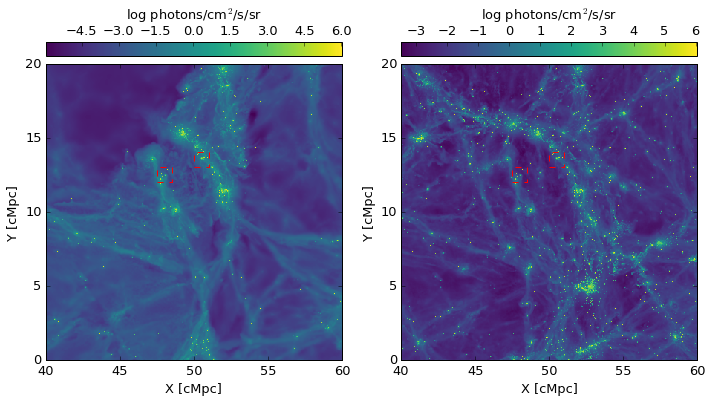

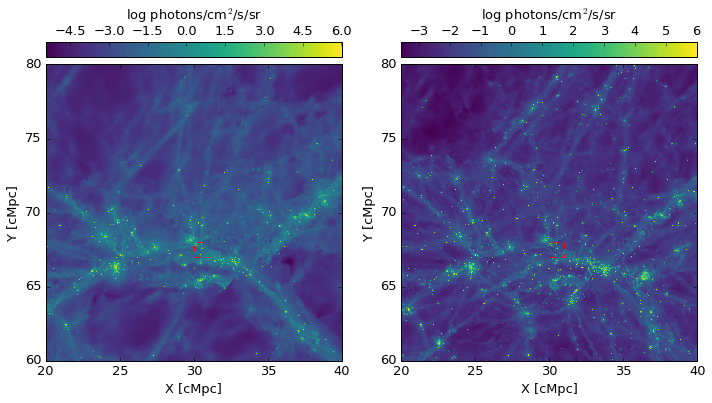

In [18]:
def plotcutout(data,minx,miny,size):
    shape = data.shape[0]
    data_cutout = data[int(minx/100.*shape):int((minx+size)/100.*shape),int(miny/100.*shape):int((miny+size)/100.*shape)]
    return data_cutout

def plotbox(minx,miny,size):
    ax1.plot([minx,minx+size,minx+size,minx,minx],[miny,miny,miny+size,miny+size,miny],'r--')
    ax2.plot([minx,minx+size,minx+size,minx,minx],[miny,miny,miny+size,miny+size,miny],'r--')

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(data_tuple_5[0],100,ax1,xystarts = [0,0])
get_halpha_SB.makemap(data_tuple_20[0],100,ax2,xystarts = [0,0])
plotbox(40.,0.,20.)
plotbox(20.,60.,20.)
plt.tight_layout()

# center around x,y = 50.5,13.5
minx = 40.; miny = 0.; size = 20.
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 10))
get_halpha_SB.makemap(plotcutout(data_tuple_5[0],minx,miny,size),size,ax1,xystarts=[minx,miny])
get_halpha_SB.makemap(plotcutout(data_tuple_20[0],minx,miny,size),size,ax2,xystarts=[minx,miny])
plotbox(50.,13.,1.)
plotbox(47.5,12.,1.)
plt.tight_layout()

# center around x,y = 30.5,67.5
minx = 20.; miny = 60.; size = 20.
fig,(ax1,ax2) = plt.subplots(1, 2, figsize=(10, 10))
get_halpha_SB.makemap(plotcutout(data_tuple_5[0],minx,miny,size),size,ax1,xystarts=[minx,miny])
get_halpha_SB.makemap(plotcutout(data_tuple_20[0],minx,miny,size),size,ax2,xystarts=[minx,miny])
plotbox(30.,67.,1.)
plt.tight_layout()

FOV 1:
The type of size is <type 'list'>
The type of size is <type 'list'>
sizes are:
[5.2726626, 3.5151084000000004] [5.2726626, 3.5151084000000004]
xystarts are:
[47.8636687, 11.7424458] [47.8636687, 11.7424458]
the shapes of the arrays are:
(105, 71) (105, 71)
FOV 2:
The type of size is <type 'list'>
The type of size is <type 'list'>
sizes are:
[5.2726626, 3.5151084000000004] [5.2726626, 3.5151084000000004]
xystarts are:
[27.863668699999998, 65.7424458] [27.863668699999998, 65.7424458]
the shapes of the arrays are:
(105, 71) (105, 71)


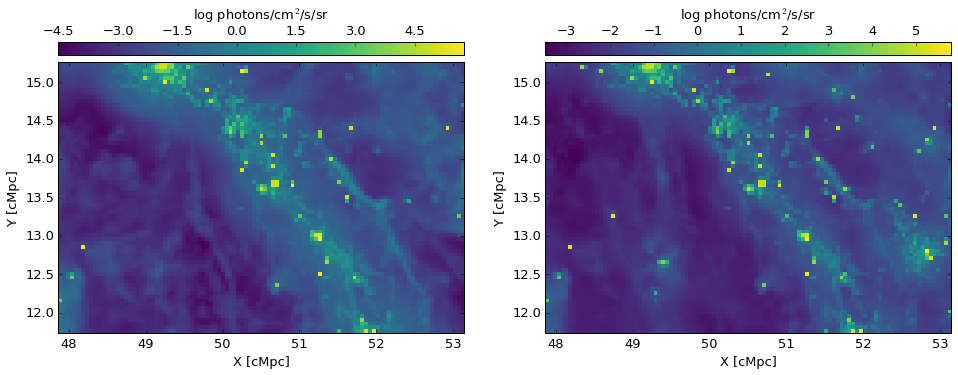

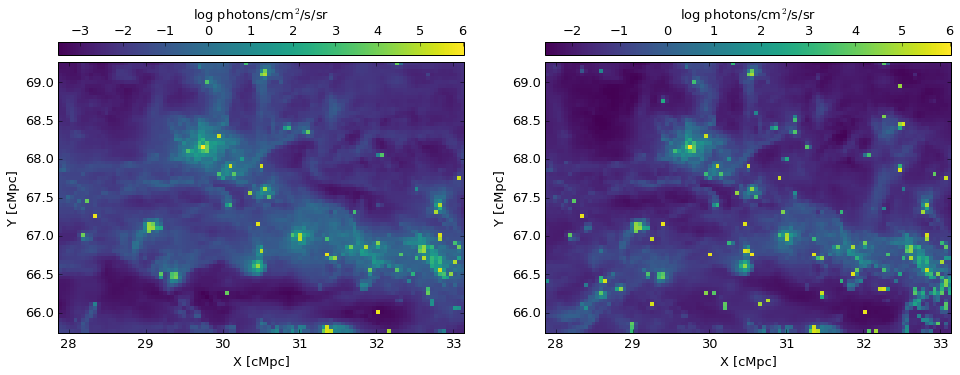

In [20]:
FOV1_5, xystarts1_5, size1_5    = extractFOV(data_tuple_5,  resolution, distance, x_center = 50.5, y_center = 13.5)
FOV1_20, xystarts1_20, size1_20 = extractFOV(data_tuple_20, resolution, distance, x_center = 50.5, y_center = 13.5)
FOV2_5, xystarts2_5, size2_5    = extractFOV(data_tuple_5,  resolution, distance, x_center = 30.5, y_center = 67.5)
FOV2_20, xystarts2_20, size2_20 = extractFOV(data_tuple_20, resolution, distance, x_center = 30.5, y_center = 67.5)

print "FOV 1:"
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(FOV1_5, size1_5, ax1,xystarts = xystarts1_5)
get_halpha_SB.makemap(FOV1_20,size1_20,ax2,xystarts = xystarts1_20)
print "sizes are:"
print size1_5, size1_20
print "xystarts are:"
print xystarts1_5, xystarts1_20
print "the shapes of the arrays are:"
print FOV1_5.shape, FOV1_20.shape

print "FOV 2:"
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(FOV2_5, size2_5, ax1,xystarts = xystarts2_5)
get_halpha_SB.makemap(FOV2_20,size2_20,ax2,xystarts = xystarts2_20)
print "sizes are:"
print size2_5, size2_20
print "xystarts are:"
print xystarts2_5, xystarts2_20
print "the shapes of the arrays are:"
print FOV2_5.shape, FOV2_20.shape


#### Just to check that this is consistent with an estimate of what the lengths of the sides of the FOVs should be:

length ~ theta * distance

The distance is 100 Mpc away from us, and theta ~ 2 deg ~ 2*pi/180 rad ~0.03 rad

So the length of the short side should be ~ 0.03 * 100Mpc = 3 Mpc.  Nice!

#### Now let's check on the number of bins

The resolution is 100":  2 deg * 3600 "/deg / 100" ~ 72 bins along the short side.  Nice!



## Example:  Testing it on our fake data